## Packages

In [6]:
# Import pyMC3 and also arviz for visualisation
import pymc3 as pm
import arviz as az

In [7]:
# Import the other data science packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats import norm
import statsmodels.formula.api as smf

## Data

In [14]:
# Generate data
x, y = datasets.make_regression(n_samples=10_000, n_features=1, noise=10, bias=5)

In [15]:
# Create the dataframe
data = pd.DataFrame(list(zip(x.flatten(), y)), columns=["x", "y"])
data

,x,y
0,-0.697414,-12.040497
1,0.122840,13.260493
2,-0.485983,-16.582404
3,-0.135506,-3.172713
4,0.177677,25.497124
...,...,...
9995,-0.452411,-6.292822
9996,-0.370117,-10.341089
9997,-0.865463,-19.377637
9998,-0.223011,6.219249


## OLS Fit

In [16]:
# OLS line
formula = "y ~ x"
results = smf.ols(formula, data=data).fit()
results.params

Intercept     5.100810
x            46.288857
dtype: float64

In [17]:
# Get the residuals
results.resid.std()

10.041434177573446

In [18]:
# Get our equation of the OLS line
inter = results.params["Intercept"]
slope = results.params["x"]
x_vals = np.arange(min(x), max(x), 0.1)
ols_line = inter + slope * x_vals

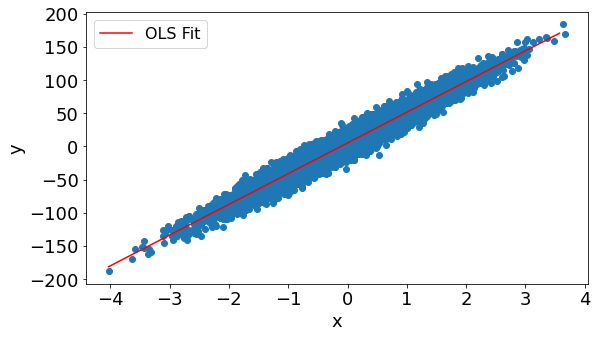

In [28]:
# Plot the target against our feature with the OLS regression
fig, ax = plt.subplots(figsize=(9, 5))
ax.scatter(data["x"], data["y"])
ax.plot(x_vals, ols_line, label="OLS Fit", color="red")
ax.ticklabel_format(style="plain")
plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)
plt.savefig("pic.png")
plt.show()

## PyMC3 Model

### 1,000 Samples

In [25]:
# Start our model
with pm.Model() as model:

    # Define the priors on each parameter:
    grad = pm.Uniform(
        "grad", lower=results.params["x"] * 0.5, upper=results.params["x"] * 1.5
    )

    inter = pm.Uniform(
        "inter",
        lower=results.params["Intercept"] * 0.5,
        upper=results.params["Intercept"] * 1.5,
    )

    sigma = pm.Uniform(
        "sigma", lower=results.resid.std() * 0.5, upper=results.resid.std() * 1.5
    )

    # Linear regression line
    mean = inter + grad * data["x"]

    # Describe the distribution of our conditional output
    y = pm.Normal("y", mu=mean, sd=sigma, observed=data["y"])

    # Run the sampling using pymc3 for 1000 samples
    trace_100 = pm.sample(100, return_inferencedata=True)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, inter, grad]


/Users/egorhowell/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/egorhowell/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/egorhowell/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/egorhowell/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 19 seconds.


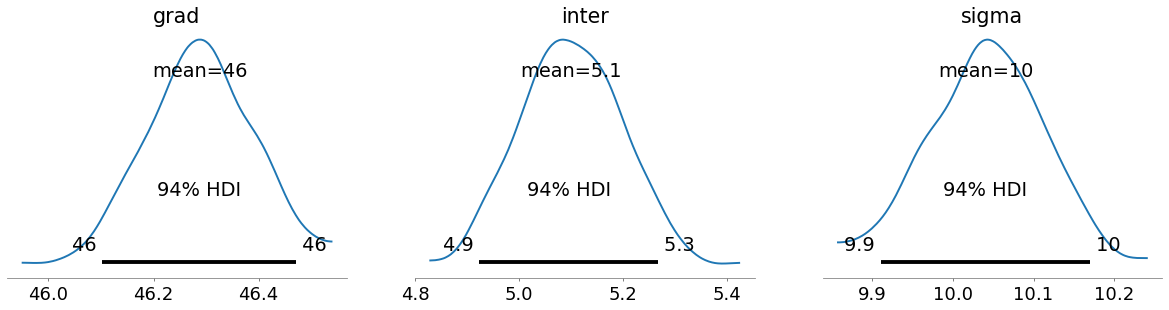

In [26]:
with model:
    az.plot_posterior(
        trace_100,
        var_names=["grad", "inter", "sigma"],
        textsize=18,
        point_estimate="mean",
        rope_color="black",
    )

### 10,000 Samples

In [22]:
# Start our model
with pm.Model() as model:

    # Define the priors on each parameter:
    grad = pm.Uniform(
        "grad", lower=results.params["x"] * 0.5, upper=results.params["x"] * 1.5
    )

    inter = pm.Uniform(
        "inter",
        lower=results.params["Intercept"] * 0.5,
        upper=results.params["Intercept"] * 1.5,
    )

    sigma = pm.Uniform(
        "sigma", lower=results.resid.std() * 0.5, upper=results.resid.std() * 1.5
    )

    # Linear regression line
    mean = inter + grad * data["x"]

    # Describe the distribution of our conditional output
    y = pm.Normal("y", mu=mean, sd=sigma, observed=data["y"])

    # Run the sampling using pymc3 for 10,000 samples
    trace_10_000 = pm.sample(10_000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, inter, grad]


/Users/egorhowell/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/egorhowell/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/egorhowell/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 22 seconds.


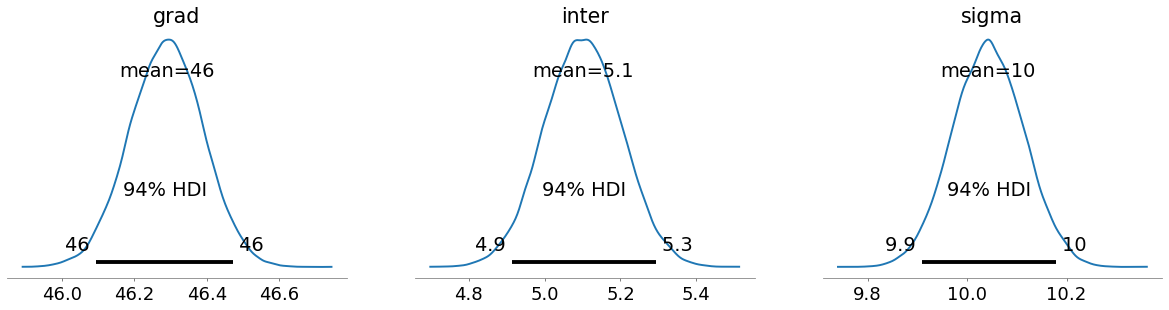

In [24]:
with model:
    az.plot_posterior(
        trace_10_000,
        var_names=["grad", "inter", "sigma"],
        textsize=18,
        point_estimate="mean",
        rope_color="black",
    )